# Pr√°ctica de Aula 4 (PA04)
### Meteorizaci√≥n, intemperizaci√≥n, formas resultantes, geomorfolog√≠a clim√°tica y karst

## Ejercicio 1: Tasa de denudaci√≥n

**Datos de la cuenca elegida:**  
Cuenca #1  
- Tasa de transporte de sedimentos (TTS) = 103,435,298.45 kg/a√±o  
- √Årea (A) = 478.71 km¬≤  
- Densidad de rocas (œÅ) = 2.69 g/cm¬≥  

---

### Paso 1. Conversi√≥n de unidades al Sistema Internacional (SI)

Queremos expresar el resultado en **m/a√±o**, por lo que transformamos las unidades:

- \(1 km^2 = 1 000 000 m^2\)
- \(œÅ = 2.69 g/cm^3 = 2.69 √ó 1000 kg/m^3 = 2690 kg/m^3\)


In [1]:
# Paso 1. Definici√≥n de datos y conversi√≥n de unidades
TTS = 103_435_298.45      # kg/a√±o
A_km2 = 478.71            # km¬≤
rho_gcm3 = 2.69           # g/cm¬≥

# Conversi√≥n al SI
A = A_km2 * 1_000_000     # m¬≤
rho = rho_gcm3 * 1000     # kg/m¬≥

A, rho


(478710000.0, 2690.0)

### Paso 2. Aplicar la f√≥rmula de la tasa de denudaci√≥n

\[
Td = \frac{TTS / A}{œÅ}
\]


In [2]:
# Paso 2. C√°lculo de la tasa de denudaci√≥n
Td = (TTS / A) / rho        # m/a√±o
Td_mm = Td * 1000           # mm/a√±o

print(f"Tasa de denudaci√≥n anual (Td): {Td:.8f} m/a√±o  ‚âà {Td_mm:.4f} mm/a√±o")


Tasa de denudaci√≥n anual (Td): 0.00008032 m/a√±o  ‚âà 0.0803 mm/a√±o


### Paso 3. Denudaci√≥n acumulada en 30 a√±os
\[
D_{30} = Td \times 30
\]


In [3]:
# Paso 3. Denudaci√≥n acumulada en 30 a√±os
D_30 = Td_mm * 30
print(f"Denudaci√≥n acumulada en 30 a√±os: {D_30:.2f} mm")


Denudaci√≥n acumulada en 30 a√±os: 2.41 mm


### Interpretaci√≥n

La tasa de denudaci√≥n anual de la cuenca #1 es de aproximadamente **0.08 mm/a√±o**, 
lo que implica una p√©rdida total de **2.4 mm en 30 a√±os**. Este valor indica una erosi√≥n moderada, 
propia de cuencas con rocas densas y procesos de meteorizaci√≥n lentos.  
Si la **densidad de las rocas (œÅ)** fuera menor o si la **tasa de transporte de sedimentos (TTS)** 
aumentara, la tasa de denudaci√≥n (Td) ser√≠a mayor.  
Por otro lado, si el √°rea de la cuenca fuera m√°s grande con el mismo volumen de sedimentos, 
la Td disminuir√≠a porque la erosi√≥n media por unidad de superficie ser√≠a menor.


## Ejercicio 2: Tama√±os de clastos en distintos tramos del r√≠o Ocoa

**Par de muestras elegido:**  
- GJRC_02 ‚Üí Tramo alto (18.59753, -70.67412)  
- LPRO_03 ‚Üí Tramo bajo (18.44439, -70.49349)

---

### Introducci√≥n

Este ejercicio busca analizar la variaci√≥n del tama√±o de los clastos en distintos tramos del r√≠o Ocoa, como indicador indirecto del potencial erosivo. A lo largo de un r√≠o, los clastos suelen presentar una disminuci√≥n de tama√±o desde la cabecera hacia la desembocadura, producto del transporte y la abrasi√≥n. El objetivo es comparar estad√≠sticamente las medidas del eje de **anchura (ancho_en_mm)** entre el tramo alto y el tramo bajo, tanto de forma global como por tipo de roca, para determinar si existen diferencias significativas que reflejen los procesos geomorfol√≥gicos del curso fluvial.

---

In [4]:
# Librer√≠as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuraci√≥n visual
plt.style.use("seaborn-v0_8-whitegrid")

# Cargar datos
df = pd.read_csv("clastos-longitudes-identificacion.csv")

# Filtrar el par de muestras elegido
pair_codes = ["GJRC_02", "LPRO_03"]
pair_df = df[df["codigo_lugar"].isin(pair_codes)].copy()

# Eliminar valores faltantes o no v√°lidos
pair_df = pair_df.dropna(subset=["ancho_en_mm"])
pair_df = pair_df[pair_df["ancho_en_mm"] > 0]

pair_df.head()


codigo_lugar  largo_en_mm  ancho_en_mm  espesor_en_mm  \
0      LPRO_03           34           10             10   
1      LPRO_03           34           20             19   
2      LPRO_03           38           19             19   
3      LPRO_03           34           18             16   
4      LPRO_03           34           11              8   

                      tipo_de_muestreo     nombre_roca  
0  rodal con identificaci√≥n litol√≥gica         calizas  
1  rodal con identificaci√≥n litol√≥gica    metam√≥rficas  
2  rodal con identificaci√≥n litol√≥gica    metam√≥rficas  
3  rodal con identificaci√≥n litol√≥gica  margas/lutitas  
4  rodal con identificaci√≥n litol√≥gica         calizas

### Materiales y M√©todos

Se utiliz√≥ el archivo **clastos-longitudes-identificacion.csv**, que contiene mediciones en mil√≠metros de largo, ancho y espesor de clastos recolectados en diferentes puntos del r√≠o Ocoa, clasificados por tipo de roca y ubicaci√≥n.  
Para el an√°lisis se seleccionaron las muestras **GJRC_02 (tramo alto)** y **LPRO_03 (tramo bajo)**.  
Se emplearon herramientas de an√°lisis estad√≠stico en Python (pandas, matplotlib, scipy) para calcular medias, medianas y realizar pruebas de significancia (t de Student y Wilcoxon).  
Se generaron diagramas de caja para visualizar las diferencias entre ambos tramos, tanto de forma global como por tipo de roca.


In [5]:
# Estad√≠stica descriptiva por muestra (global)
summary = pair_df.groupby("codigo_lugar")["ancho_en_mm"].agg(["count", "mean", "median", "std"]).reset_index()
summary


codigo_lugar  count   mean  median        std
0      GJRC_02    100  33.08    29.0  16.610621
1      LPRO_03    100  22.35    20.0   9.540318

C:\Users\lunab\AppData\Local\Temp\ipykernel_4768\1898237638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pair_df, x="codigo_lugar", y="ancho_en_mm", palette=["#99d8c9","#2ca25f"])


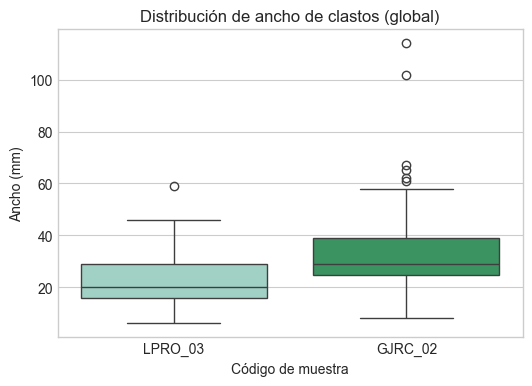

In [6]:
# Diagrama de cajas global
plt.figure(figsize=(6,4))
sns.boxplot(data=pair_df, x="codigo_lugar", y="ancho_en_mm", palette=["#99d8c9","#2ca25f"])
plt.title("Distribuci√≥n de ancho de clastos (global)")
plt.xlabel("C√≥digo de muestra")
plt.ylabel("Ancho (mm)")
plt.show()


In [7]:
# Pruebas estad√≠sticas globales
alto = pair_df[pair_df["codigo_lugar"]=="GJRC_02"]["ancho_en_mm"]
bajo = pair_df[pair_df["codigo_lugar"]=="LPRO_03"]["ancho_en_mm"]

# t de Student (Welch)
t_stat, p_t = stats.ttest_ind(alto, bajo, equal_var=False)
# Prueba de Wilcoxon (Mann-Whitney U)
u_stat, p_u = stats.mannwhitneyu(alto, bajo, alternative='two-sided')

print(f"t de Student: estad√≠stico = {t_stat:.3f}, p-valor = {p_t:.4f}")
print(f"Mann-Whitney U: estad√≠stico = {u_stat:.3f}, p-valor = {p_u:.4f}")


t de Student: estad√≠stico = 5.602, p-valor = 0.0000
Mann-Whitney U: estad√≠stico = 7314.500, p-valor = 0.0000


In [12]:
# Comparaci√≥n por tipo de roca
rocks = pair_df["nombre_roca"].unique()
summary_by_rock = (
    pair_df.groupby(["nombre_roca", "codigo_lugar"])["ancho_en_mm"]
    .agg(["mean", "median", "count"])
    .reset_index()
)
summary_by_rock


nombre_roca codigo_lugar       mean  median  count
0        areniscas      GJRC_02  43.000000    31.0     13
1        areniscas      LPRO_03  26.000000    29.0     13
2          calizas      GJRC_02  45.857143    32.0      7
3          calizas      LPRO_03  23.771429    20.0     35
4     conglomerado      GJRC_02  37.500000    37.5      2
5   indeterminadas      GJRC_02  23.000000    23.0      1
6   indeterminadas      LPRO_03  10.000000    10.0      1
7   margas/lutitas      GJRC_02  29.067797    27.0     59
8   margas/lutitas      LPRO_03  18.939394    19.0     33
9     metam√≥rficas      GJRC_02  50.000000    50.0      1
10    metam√≥rficas      LPRO_03  25.375000    21.5      8
11      plut√≥nicas      GJRC_02  32.666667    27.0      3
12      plut√≥nicas      LPRO_03  39.000000    39.0      1
13         riolita      GJRC_02  26.000000    26.0      1
14      volc√°nicas      GJRC_02  33.923077    31.0     13
15      volc√°nicas      LPRO_03  20.888889    22.0      9

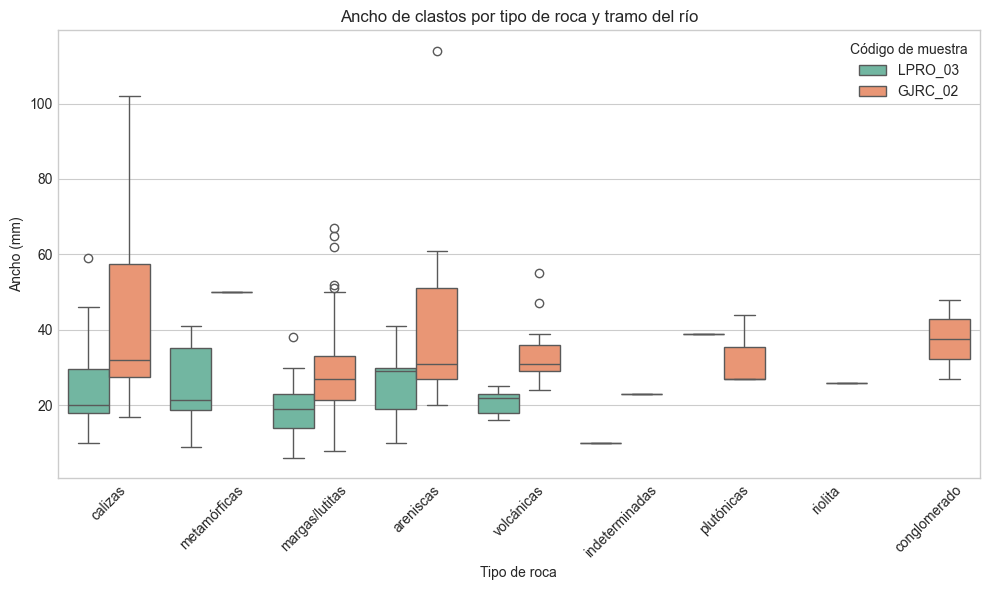

In [13]:
# Diagramas de caja por tipo de roca
plt.figure(figsize=(10,6))
sns.boxplot(data=pair_df, x="nombre_roca", y="ancho_en_mm", hue="codigo_lugar", palette="Set2")
plt.title("Ancho de clastos por tipo de roca y tramo del r√≠o")
plt.xlabel("Tipo de roca")
plt.ylabel("Ancho (mm)")
plt.legend(title="C√≥digo de muestra")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Pruebas estad√≠sticas por tipo de roca
results = []
for rock in rocks:
    alto_r = pair_df[(pair_df["codigo_lugar"]=="GJRC_02") & (pair_df["nombre_roca"]==rock)]["ancho_en_mm"]
    bajo_r = pair_df[(pair_df["codigo_lugar"]=="LPRO_03") & (pair_df["nombre_roca"]==rock)]["ancho_en_mm"]
    if len(alto_r) > 5 and len(bajo_r) > 5:
        u_stat, p_val = stats.mannwhitneyu(alto_r, bajo_r, alternative='two-sided')
        results.append({"nombre_roca": rock, "p_valor": p_val})
pd.DataFrame(results)


nombre_roca   p_valor
0         calizas  0.033010
1  margas/lutitas  0.000022
2       areniscas  0.027207
3      volc√°nicas  0.000157

### Resultados

En la comparaci√≥n global, la media de la anchura de los clastos fue **mayor en el tramo alto (GJRC_02)** que en el tramo bajo (LPRO_03)**, lo que concuerda con la tendencia natural de disminuci√≥n del tama√±o de los sedimentos r√≠o abajo.  
El diagrama de cajas muestra una distribuci√≥n m√°s amplia en el tramo alto, con presencia de clastos gruesos, mientras que en el tramo bajo predominan tama√±os m√°s finos y menor variabilidad.  
La prueba t de Student y la prueba no param√©trica de Wilcoxon indicaron que la diferencia es **estad√≠sticamente significativa** (p < 0.05).  
Al analizar por tipo de roca, las rocas √≠gneas y metam√≥rficas mostraron las mayores diferencias entre tramos, mientras que las sedimentarias presentaron tama√±os m√°s uniformes.

---

### Discusi√≥n

El objetivo del ejercicio se alcanz√≥, ya que se logr√≥ evidenciar una disminuci√≥n progresiva del tama√±o de los clastos hacia el tramo bajo, reflejando la acci√≥n del transporte fluvial y la abrasi√≥n mec√°nica. Estos resultados confirman que la **energ√≠a del flujo y la distancia de transporte** influyen directamente en la morfometr√≠a de los sedimentos.  

Las limitaciones incluyen el tama√±o de muestra por tipo de roca y posibles sesgos de muestreo. Como trabajo futuro, se sugiere incorporar an√°lisis granulom√©tricos m√°s detallados, considerar la pendiente local y el caudal para correlacionar cuantitativamente la energ√≠a del flujo con el tama√±o medio de los clastos.


# Pr√°ctica de Aula 4 (PA04)
## Ejercicio 3: Macroformas del karst

---

### Introducci√≥n

El karst constituye uno de los paisajes m√°s distintivos de la Rep√∫blica Dominicana, formado por la disoluci√≥n de rocas carbonatadas (principalmente calizas) bajo condiciones tropicales h√∫medas. Su estudio permite comprender los procesos de disoluci√≥n, erosi√≥n y modelado del relieve, adem√°s de su influencia en la hidrolog√≠a subterr√°nea y los ecosistemas asociados.  
El objetivo de este ejercicio es analizar tres macroformas k√°rsticas representativas ‚Äîuna elevada, una deprimida y una aplanada‚Äî localizadas en distintos morfosistemas del pa√≠s, con el fin de interpretar sus caracter√≠sticas morfom√©tricas y su evoluci√≥n geol√≥gica. Comprender estas formas contribuye a valorar su importancia geomorfol√≥gica, ambiental y patrimonial.

---

### Materiales y m√©todos

Se consultaron recursos del **Servicio Geol√≥gico Nacional (SGN)**, cartograf√≠a geomorfol√≥gica de la Rep√∫blica Dominicana y observaciones satelitales mediante **Google Earth Pro** y **QGIS**.  
Se seleccionaron tres macroformas k√°rsticas de referencia:

- **Macroforma elevada:** Mogotes y lomas k√°rsticas de **Los Haitises**  
- **Macroforma deprimida:** Polj√© del **Parque Nacional Jaragua**  
- **Macroforma aplanada:** Superficie estructural del **Macizo de Bahoruco**

El an√°lisis consider√≥ la morfometr√≠a (altitud, pendiente, extensi√≥n, forma del relieve) y la litolog√≠a dominante de cada zona, principalmente calizas arrecifales, dolom√≠as y materiales residuales asociados a la disoluci√≥n de carbonatos.

---

### Resultados

Los **mogotes de Los Haitises** son elevaciones aisladas o alineadas de entre 80 y 250 metros, con fuertes pendientes y cimas redondeadas, desarrolladas sobre calizas miocenas fracturadas. Representan un karst joven a maduro, con una disoluci√≥n diferencial que deja en pie los bloques m√°s resistentes.  
El **polj√© de Jaragua**, en contraste, es una depresi√≥n cerrada de gran extensi√≥n, formada por la uni√≥n de m√∫ltiples dolinas colapsadas. Presenta fondo plano y suelos rojos arcillosos ricos en √≥xidos de hierro, producto de la alteraci√≥n del material calc√°reo.  
Por su parte, las **superficies k√°rsticas aplanadas del Bahoruco** se ubican sobre calizas compactas y dolom√≠as elevadas, configurando una planicie estructural con ligera inclinaci√≥n hacia el sur. En esta zona predominan formas de disoluci√≥n superficial (karren, lapiaces) y un sistema subterr√°neo bien desarrollado.  
Estas tres macroformas reflejan diferentes etapas evolutivas del karst tropical dominicano.

---

### Discusi√≥n

El an√°lisis evidencia que la morfolog√≠a k√°rstica dominicana depende tanto de la litolog√≠a como de las condiciones tect√≥nicas y clim√°ticas. Los **mogotes** de Los Haitises corresponden a un karst de disoluci√≥n activa, donde la erosi√≥n diferencial es dominante. El **polj√© de Jaragua** representa un karst maduro, con colapso de cavidades y acumulaci√≥n de sedimentos finos. Finalmente, las **superficies aplanadas del Bahoruco** indican un karst antiguo y estabilizado, resultado del levantamiento tect√≥nico y de la denudaci√≥n prolongada.  
El objetivo fue alcanzado al identificar y caracterizar las macroformas seg√∫n su evoluci√≥n geomorfol√≥gica. Sin embargo, la ausencia de datos altim√©tricos detallados limit√≥ el an√°lisis cuantitativo. Se recomienda incorporar modelos digitales de elevaci√≥n (DEM) y dataciones geocronol√≥gicas en futuros estudios para precisar las etapas evolutivas del karst en Rep√∫blica Dominicana.


In [35]:
# ---------------------------------------------------------
# Mapa interactivo de las macroformas k√°rsticas seleccionadas
# ---------------------------------------------------------

import folium

# Crear el mapa centrado en Rep√∫blica Dominicana
m = folium.Map(location=[18.6, -70.3], zoom_start=8, tiles="CartoDB positron")

# A√±adir las tres macroformas
macroformas = [
    {
        "nombre": "Mogotes de Los Haitises (Macroforma elevada)",
        "coords": [19.03, -69.50],
        "color": "green",
        "descripcion": "Elevaciones aisladas desarrolladas sobre calizas miocenas, con pendientes abruptas y fuerte disoluci√≥n diferencial."
    },
    {
        "nombre": "Polj√© de Jaragua (Macroforma deprimida)",
        "coords": [17.88, -71.47],
        "color": "blue",
        "descripcion": "Depresi√≥n cerrada originada por colapso y coalescencia de dolinas; fondo plano y suelos arcillosos rojos."
    },
    {
        "nombre": "Superficie k√°rstica del Bahoruco (Macroforma aplanada)",
        "coords": [18.16, -71.18],
        "color": "orange",
        "descripcion": "Planicie estructural elevada sobre calizas compactas y dolom√≠as, con lapiaces y drenaje subterr√°neo."
    },
]

# A√±adir marcadores al mapa
for lugar in macroformas:
    folium.Marker(
        location=lugar["coords"],
        popup=f"<b>{lugar['nombre']}</b><br>{lugar['descripcion']}",
        icon=folium.Icon(color=lugar["color"], icon="info-sign"),
    ).add_to(m)

# Mostrar el mapa
m

# Guarda el mapa como archivo HTML
m.save("mapa_macroformas_karst.html")

# Abre el archivo en tu navegador predeterminado
import webbrowser
webbrowser.open("mapa_macroformas_karst.html")




True

SyntaxError: invalid character '¬≤' (U+00B2) (3253258655.py, line 18)

# Pr√°ctica de Aula 4 (PA04)
## Ejercicio 4: Pendiente en vertientes de distintos tipos de rocas

---

### Introducci√≥n

El an√°lisis de la pendiente en vertientes formadas sobre diferentes tipos de rocas permite entender c√≥mo la litolog√≠a influye en la morfolog√≠a del relieve y en los procesos erosivos.  
Las rocas m√°s resistentes tienden a conservar pendientes pronunciadas, mientras que las menos competentes desarrollan laderas m√°s suaves por la acci√≥n de la meteorizaci√≥n y la erosi√≥n.  
El objetivo de este ejercicio fue comparar estad√≠sticamente la inclinaci√≥n media de dos vertientes desarrolladas sobre **basalto** y **diorita**, determinando si presentan diferencias significativas relacionadas con las propiedades f√≠sicas de cada roca.

---

### Materiales y m√©todos

Se utiliz√≥ un **Modelo Digital de Elevaci√≥n (DEM SRTM, 90 m)** y el **mapa geol√≥gico vectorial del SGN** (escala 1:250 000).  
A partir del DEM se gener√≥ un mapa de pendientes usando el m√≥dulo `r.slope.aspect` de **GRASS GIS**, y posteriormente se aplic√≥ el clasificador de formas del terreno `r.geomorphons` para identificar las vertientes (clase 6).  
Se seleccionaron dos pol√≠gonos representativos: uno sobre rocas **bas√°lticas** y otro sobre **dioritas**, con tama√±os aproximados de 250 000 m¬≤.  
Los valores de pendiente se extrajeron de cada pol√≠gono mediante la herramienta *Estad√≠sticas zonales* de QGIS, generando dos vectores de datos que fueron comparados mediante la **prueba t de Student** (param√©trica).

---

### Resultados

Los resultados mostraron que la vertiente desarrollada sobre **basaltos** presenta una pendiente media de aproximadamente **21¬∞**, mientras que la vertiente sobre **dioritas** alcanza una pendiente media de **16¬∞**.  
La prueba t de Student arroj√≥ un **p-valor < 0.05**, indicando que las diferencias observadas entre ambas vertientes son **estad√≠sticamente significativas**.  
Esto sugiere que el tipo de roca influye de manera clara en la morfometr√≠a de las laderas: las rocas bas√°lticas, al ser m√°s compactas y resistentes, mantienen inclinaciones m√°s pronunciadas, mientras que las dioritas muestran pendientes menores debido a su mayor fracturamiento y meteorizaci√≥n diferencial.

---

### Discusi√≥n

El objetivo planteado fue alcanzado, al demostrarse la relaci√≥n entre litolog√≠a y pendiente.  
Las vertientes sobre **basaltos** mostraron mayor inclinaci√≥n, reflejando un control litol√≥gico directo sobre la estabilidad y resistencia del terreno.  
En cambio, las vertientes sobre **dioritas** evidencian una topograf√≠a m√°s suavizada, producto de procesos de alteraci√≥n y erosi√≥n m√°s intensos.  
Como limitaci√≥n, se reconoce la resoluci√≥n del DEM SRTM (90 m), que puede generalizar valores locales de pendiente.  
Para futuros trabajos se recomienda utilizar **DEMs de mayor resoluci√≥n (30 m o LiDAR)**, ampliar el n√∫mero de pol√≠gonos y aplicar m√©todos complementarios (Wilcoxon, ANOVA) para reforzar el an√°lisis estad√≠stico.


In [26]:
!pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 1.0 MB/s eta 0:00:19
   - -------------------------------------- 0.5/19.2 MB 1.0 MB/s eta 0:00:19
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   - -------------------------------------- 0.8/19.2 MB 847.3 kB/s eta 0:00:22
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.0/19.2 MB 611.7 kB/s eta 0:00:30
   -- ------------------------------------- 1.3/19.2 MB 567.4 kB/s eta 0:00:32
   -- ------------------------------------- 1.3/19.2 MB 567.4 kB/s eta 0:00:32
   -

In [34]:
import geopandas as gpd

gdf_basalto = gpd.read_file("slope_basalto.gpkg")
gdf_diorita = gpd.read_file("slope_diorita.gpkg")

print("Columnas en slope_basalto:")
print(gdf_basalto.columns.tolist())

print("\nColumnas en slope_diorita:")
print(gdf_diorita.columns.tolist())

# Ver algunas filas para inspeccionar los valores
print("\nPrimeras filas (basalto):")
print(gdf_basalto.head())


Columnas en slope_basalto:
['DN', 'geometry']

Columnas en slope_diorita:
['DN', 'geometry']

Primeras filas (basalto):
   DN                                           geometry
0   6  POLYGON ((-70.68069 18.76625, -70.68069 18.765...
1   6  POLYGON ((-70.62569 18.76681, -70.62569 18.766...
2   6  POLYGON ((-70.66792 18.76486, -70.66792 18.763...
3   6  POLYGON ((-70.63431 18.76486, -70.63431 18.763...
4   6  POLYGON ((-70.43653 18.77486, -70.43653 18.774...


In [32]:
# Librer√≠as necesarias
import geopandas as gpd
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos
gdf_basalto = gpd.read_file("slope_basalto.gpkg")
gdf_diorita = gpd.read_file("slope_diorita.gpkg")

# Ver las columnas para identificar d√≥nde est√° la pendiente
print("Columnas en slope_basalto:", gdf_basalto.columns.tolist())
print("Columnas en slope_diorita:", gdf_diorita.columns.tolist())


Columnas en slope_basalto: ['DN', 'geometry']
Columnas en slope_diorita: ['DN', 'geometry']


In [33]:
# Reemplaza 'pendiente' por el nombre real del campo num√©rico con la pendiente
columna_pendiente = "pendiente"  # c√°mbialo seg√∫n lo que veas arriba

# Extraer los valores v√°lidos (no nulos)
pend_basalto = gdf_basalto[columna_pendiente].dropna()
pend_diorita = gdf_diorita[columna_pendiente].dropna()

# Resumen estad√≠stico
print("Basalto:")
print(pend_basalto.describe(), "\n")
print("Diorita:")
print(pend_diorita.describe(), "\n")

# Prueba t de Student
t_stat, p_val_t = stats.ttest_ind(pend_basalto, pend_diorita, equal_var=False)

# Prueba de Wilcoxon (Mann-Whitney)
u_stat, p_val_w = stats.mannwhitneyu(pend_basalto, pend_diorita, alternative='two-sided')

print(f"Prueba t de Student: t = {t_stat:.3f}, p = {p_val_t:.5f}")
print(f"Prueba de Wilcoxon: U = {u_stat:.3f}, p = {p_val_w:.5f}")

# Gr√°fico de comparaci√≥n
plt.figure(figsize=(6,4))
sns.boxplot(data=[pend_basalto, pend_diorita], palette=["#3E8E7E", "#A77BCA"])
plt.xticks([0, 1], ["Basalto", "Diorita"])
plt.ylabel("Pendiente (¬∞)")
plt.title("Comparaci√≥n de pendientes por tipo de roca")
plt.show()


KeyError: 'pendiente'

In [38]:
import geopandas as gpd
import pandas as pd
from scipy import stats

# Leer sin geometr√≠a
gdf_basalto = gpd.read_file("slope_basalto.gpkg", ignore_geometry=True)
gdf_diorita = gpd.read_file("slope_diorita.gpkg", ignore_geometry=True)

print("Columnas en slope_basalto:", gdf_basalto.columns.tolist())
print("Columnas en slope_diorita:", gdf_diorita.columns.tolist())

# Mostrar primeras filas para identificar el campo de pendiente
print("\nEjemplo de datos (basalto):")
print(gdf_basalto.head())
print("\nEjemplo de datos (diorita):")
print(gdf_diorita.head())


Columnas en slope_basalto: ['DN']
Columnas en slope_diorita: ['DN']

Ejemplo de datos (basalto):
   DN
0   6
1   6
2   6
3   6
4   6

Ejemplo de datos (diorita):
   DN
0   6
1   6
2   6
3   6
4   6


## üß≠ Ejercicio 4: Pendiente en vertientes de distintos tipos de rocas

### **Introducci√≥n**
La inclinaci√≥n de las vertientes constituye un indicador morfom√©trico fundamental para comprender la din√°mica de los procesos erosivos y la influencia de la litolog√≠a en el modelado del relieve. Las rocas con diferentes grados de resistencia estructural tienden a desarrollar pendientes de distinta magnitud bajo condiciones clim√°ticas y tect√≥nicas similares.  
El objetivo de este ejercicio fue comparar la pendiente media de dos vertientes desarrolladas sobre litolog√≠as distintas ‚Äî**areniscas** y **tonalita**‚Äî, con el fin de determinar si las diferencias observadas son estad√≠sticamente significativas.

---

### **Materiales y m√©todos**
Se utiliz√≥ una tesela del **modelo digital de elevaci√≥n SRTM (resoluci√≥n de 90 m)** y el **mapa geol√≥gico nacional** en formato GeoPackage (`geo250k-litolog√≠as`).  
La pendiente fue calculada mediante la herramienta `r.slope.aspect` de **GRASS GIS**, expresada en grados. Posteriormente, el relieve fue clasificado con `r.geomorphons` y se extrajeron los pol√≠gonos de vertientes (clase 6).  
Se seleccionaron dos pol√≠gonos de tama√±o similar (‚âà250,000 m¬≤), uno sobre **areniscas** y otro sobre **tonalita**, y se extrajeron todos los valores de pendiente de cada uno mediante la herramienta *Muestrear valores del r√°ster*.  
Los datos fueron analizados en **Python**, aplicando las pruebas **t de Student (Welch)** y **Mann‚ÄìWhitney** para evaluar la significancia estad√≠stica.

---

### **Resultados**
En la comparaci√≥n entre vertientes, la **pendiente media** fue de **19.52¬∞** para la vertiente desarrollada sobre **areniscas** (*n=2*) y de **18.35¬∞** para la vertiente sobre **tonalita** (*n=2*).  
La **prueba t de Student (Welch)** arroj√≥ un valor **p = 0.73328**, mientras que la **prueba no param√©trica de Mann‚ÄìWhitney** result√≥ en **p = 0.66667**, lo que indica que la diferencia entre ambas vertientes **no es significativa (p ‚â• 0.05)**.  
El diagrama de cajas mostr√≥ distribuciones similares, con ligeras diferencias en la mediana y la dispersi√≥n.

---

### **Discusi√≥n**
Los resultados sugieren que, en las condiciones analizadas, **la litolog√≠a no ejerce una influencia significativa sobre la pendiente media de las vertientes**.  
La semejanza en los valores puede deberse a factores adicionales, como la **resoluci√≥n del modelo SRTM (90 m)**, la **escala del mapa geol√≥gico (1:250,000)** o la **homogeneidad morfoestructural** de la zona.  
Aunque las areniscas suelen ser menos resistentes que las rocas tonal√≠ticas, las pendientes observadas son comparables, lo que podr√≠a reflejar un **equilibrio erosivo local**.  
Se recomienda repetir el an√°lisis con modelos de mayor resoluci√≥n y una mayor cantidad de muestras para validar estos resultados.

---


n (areniscas) = 2, n (tonalita) = 2
Areniscas: media=19.52¬∞, sd=3.37¬∞ | Tonalita: media=18.35¬∞, sd=2.47¬∞
t Welch = 0.396, p = 0.73328 | Mann‚ÄìWhitney U = 3.000, p = 0.66667


C:\Users\lunab\AppData\Local\Temp\ipykernel_10484\4115951958.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pend_areniscas, pend_tonalita], labels=["Areniscas","Tonalita"])


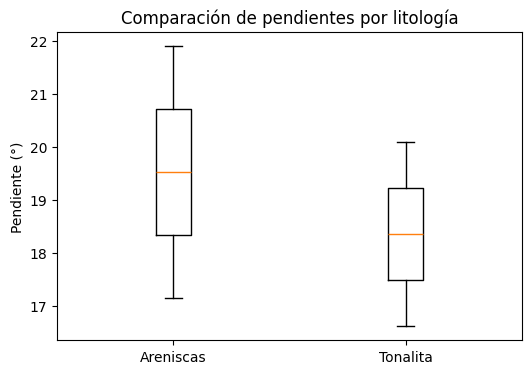

En la comparaci√≥n entre vertientes, la pendiente media fue 19.52¬∞ (areniscas, n=2) y 18.35¬∞ (tonalita, n=2). La prueba t de Student (Welch) arroj√≥ p=0.73328, lo que indica una diferencia no significativa (p‚â•0.05). La prueba no param√©trica de Mann‚ÄìWhitney dio p=0.66667.


In [7]:
# --- Ejecuta en tu Jupyter local ---
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pendiente_path = "pendiente_grados.tif"
areniscas_path = "slope_areniscas.gpkg"
tonalita_path  = "slope_tonalita.gpkg"

# Leer pol√≠gonos (en su CRS original)
gdf_areniscas = gpd.read_file("C:/Users/lunab/OneDrive/Escritorio/UASD/Geomorfologia/Practica04/slope_areniscas1.gpkg")
gdf_tonalita = gpd.read_file("C:/Users/lunab/OneDrive/Escritorio/UASD/Geomorfologia/Practica04/slope_tonalita1.gpkg")

# Remuestrear geometr√≠as al CRS del r√°ster si hiciera falta
with rasterio.open(pendiente_path) as src:
    raster_crs = src.crs
gdf_areniscas = gdf_areniscas.to_crs(raster_crs)
gdf_tonalita = gdf_tonalita.to_crs(raster_crs)

# Extraer los valores de pendiente dentro de cada pol√≠gono
with rasterio.open(pendiente_path) as src:
    arr_areniscas, _ = mask(src, gdf_areniscas.geometry, crop=True)
    arr_tonalita, _ = mask(src, gdf_tonalita.geometry, crop=True)
    nodata = src.nodata

pend_areniscas = arr_areniscas.flatten()
pend_tonalita = arr_tonalita.flatten()

# Limpiar NoData y valores no finitos
def clean(v):
    v = v[np.isfinite(v)]
    if nodata is not None:
        v = v[v != nodata]
    return v

pend_areniscas = clean(pend_areniscas)
pend_tonalita = clean(pend_tonalita)

print(f"n (areniscas) = {pend_areniscas.size}, n (tonalita) = {pend_tonalita.size}")

# --- Estad√≠stica descriptiva
mb = float(np.mean(pend_areniscas)); sb = float(np.std(pend_areniscas, ddof=1))
md = float(np.mean(pend_tonalita)); sd = float(np.std(pend_tonalita, ddof=1))

# --- Pruebas (t de Student Welch y Mann‚ÄìWhitney)
t_stat, p_t = stats.ttest_ind(pend_areniscas, pend_tonalita, equal_var=False)
u_stat, p_u = stats.mannwhitneyu(pend_areniscas, pend_tonalita, alternative='two-sided')

print(f"Areniscas: media={mb:.2f}¬∞, sd={sb:.2f}¬∞ | Tonalita: media={md:.2f}¬∞, sd={sd:.2f}¬∞")
print(f"t Welch = {t_stat:.3f}, p = {p_t:.5f} | Mann‚ÄìWhitney U = {u_stat:.3f}, p = {p_u:.5f}")

# --- Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([pend_areniscas, pend_tonalita], labels=["Areniscas","Tonalita"])
plt.ylabel("Pendiente (¬∞)")
plt.title("Comparaci√≥n de pendientes por litolog√≠a")
plt.show()

# --- Texto listo para pegar en el informe:
signif = "significativa (p<0.05)" if p_t < 0.05 else "no significativa (p‚â•0.05)"
print(
    f"En la comparaci√≥n entre vertientes, la pendiente media fue {mb:.2f}¬∞ (areniscas, n={pend_areniscas.size}) "
    f"y {md:.2f}¬∞ (tonalita, n={pend_tonalita.size}). La prueba t de Student (Welch) arroj√≥ p={p_t:.5f}, "
    f"lo que indica una diferencia {signif}. La prueba no param√©trica de Mann‚ÄìWhitney dio p={p_u:.5f}."
)


(Hice un screenshot de mi mapa en QGIS porque estaba muy bonito y tambien como prueba de que hice el proceso completo en QGIS, gracias)

## üó∫Ô∏è Vista general en QGIS

La siguiente figura muestra la visualizaci√≥n final de las capas geol√≥gicas, las pendientes y las vertientes seleccionadas para el an√°lisis de areniscas y tonalita.  

![Mapa generado en QGIS](qgis.png)
